<a href="https://colab.research.google.com/github/thendralbala/ML_from_scratch/blob/main/3_Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Macines (SVM)
Support Vector Machines (SVMs) are powerful supervised machine learning models used for both classification and regression tasks.



1.   Goal: SVMs aim to find an optimal hyperplane that best separates data points into different classes or predicts a continuous target variable.
2.   Hyperplane: This is a decision boundary that maximizes the margin between data points of different classes. In a 2D space, it's a line; in 3D, it's a plane, and so on.
3. Margin: This is the distance between the hyperplane and the nearest data points of each class, known as support vectors. A larger margin generally leads to better generalization performance.
4. Support Vectors: These are the data points closest to the hyperplane and have the most influence on its position.
5. Kernel Trick: For non-linearly separable data, SVMs use kernel functions to map data points to a higher-dimensional space where they become linearly separable. This enables SVMs to handle complex relationships in data.
6. Types:


        *   Linear SVM: Used for linearly separable data, where a straight line or plane can separate classes.
        *   Non-linear SVM: Used for non-linearly separable data, employing kernel functions like polynomial or radial basis function (RBF) to find a non-linear decision boundary


In essence, SVMs seek to find the best hyperplane that maximizes the margin between classes, leading to robust and accurate predictions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
def load_data(input_file):
  X = []
  y = []
  with open(input_file, 'r') as f:
    for line in f.readlines():
      data = [float(x) for x in line.split(',')]
      X.append(data[:-1])
      y.append(data[-1])

  X = np.array(X)
  y = np.array(y)

  return X,y

In [4]:
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here:
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15),
                textcoords = 'offset points',
                horizontalalignment = 'right',
                verticalalignment = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

In [6]:
X, y = load_data('data_multivar.txt')

In [7]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1])


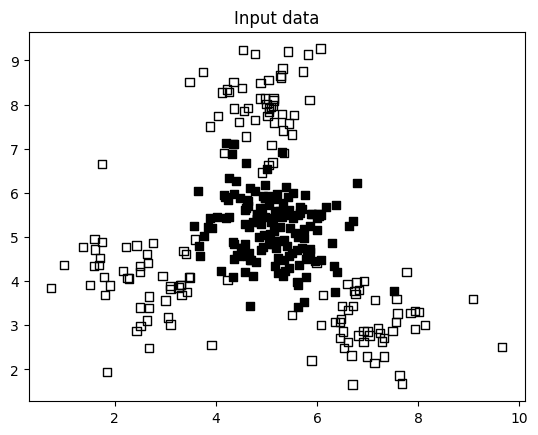

In [8]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:, 1], facecolors = 'black', edgecolors = 'black', marker = 's')
plt.scatter(class_1[:,0], class_1[:, 1], facecolors = 'None', edgecolors = 'black', marker = 's')
plt.title('Input data')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)


In [10]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

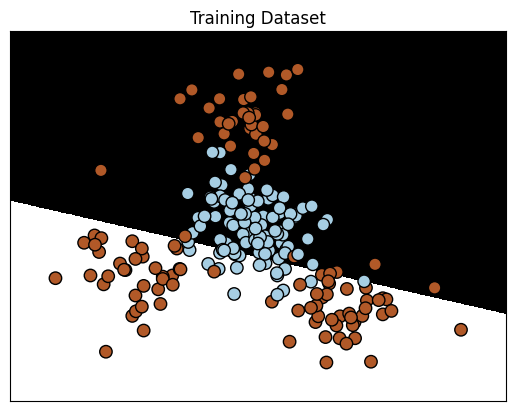

In [11]:
plot_classifier(classifier,X_train, y_train,'Training Dataset')
plt.show()

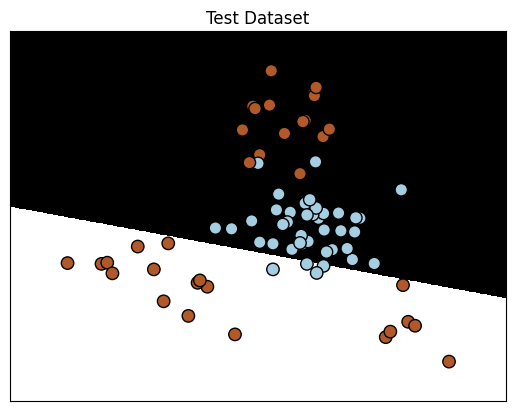

In [12]:
y_test_pred = classifier.predict(X_test)
plot_classifier(classifier, X_test, y_test, 'Test Dataset')
plt.show()

In [13]:
from sklearn.metrics import classification_report

target_names = ['Class-' + str(int (i)) for i in set(y)]
print("Classifier performance of training dataset")
print(classification_report(y_train, classifier.predict(X_train), target_names = target_names))


Classifier performance of training dataset
              precision    recall  f1-score   support

     Class-0       0.69      0.82      0.75       110
     Class-1       0.79      0.64      0.71       115

    accuracy                           0.73       225
   macro avg       0.74      0.73      0.73       225
weighted avg       0.74      0.73      0.73       225



In [14]:
print("Classifier performance of testing dataset")
print(classification_report(y_test, y_test_pred, target_names = target_names))

Classifier performance of testing dataset
              precision    recall  f1-score   support

     Class-0       0.69      0.90      0.78        40
     Class-1       0.83      0.54      0.66        35

    accuracy                           0.73        75
   macro avg       0.76      0.72      0.72        75
weighted avg       0.75      0.73      0.72        75



#Building a Non-Linear Classifier using SVM

In [15]:
classifier = SVC(kernel = 'poly', degree = 3)
classifier.fit(X_train, y_train)

SVC(kernel='poly')

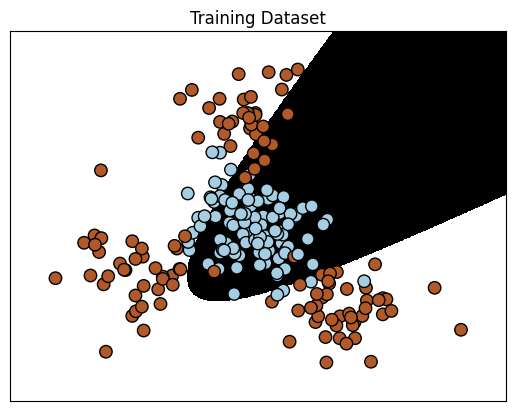

In [16]:
plot_classifier(classifier,X_train, y_train,'Training Dataset')
plt.show()

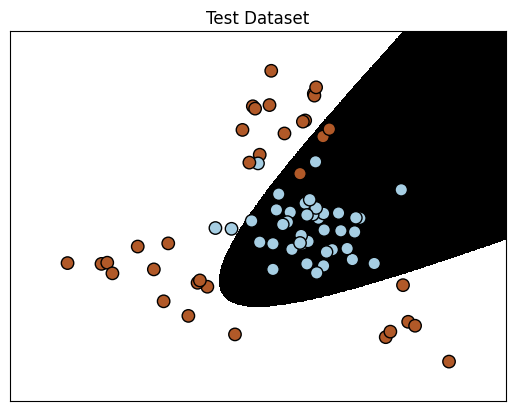

In [17]:
y_test_pred = classifier.predict(X_test)
plot_classifier(classifier, X_test, y_test, 'Test Dataset')
plt.show()

In [18]:
target_names = ['Class-' + str(int (i)) for i in set(y)]
print("Classifier performance of training dataset")
print(classification_report(y_train, classifier.predict(X_train), target_names = target_names))

Classifier performance of training dataset
              precision    recall  f1-score   support

     Class-0       0.91      0.83      0.87       110
     Class-1       0.85      0.92      0.88       115

    accuracy                           0.88       225
   macro avg       0.88      0.87      0.88       225
weighted avg       0.88      0.88      0.88       225



In [19]:
print("Classifier performance of testing dataset")
print(classification_report(y_test, y_test_pred, target_names = target_names))

Classifier performance of testing dataset
              precision    recall  f1-score   support

     Class-0       0.93      0.93      0.93        40
     Class-1       0.91      0.91      0.91        35

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

